## Acne classification with CLIP

In [7]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

import clip
import random

In [ ]:
# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [11]:
# Define the categories
categories = ["a face with acne", "a face without acne"]

# Function to classify an image
def classify_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image_input = preprocess(image).unsqueeze(0).to(device)
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(clip.tokenize(categories).to(device))
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
        predicted_category = categories[similarity.argmax()]
    return predicted_category


./test_filter_acne/1345960370.jpg


Text(0.5, 1.0, 'a face without acne')

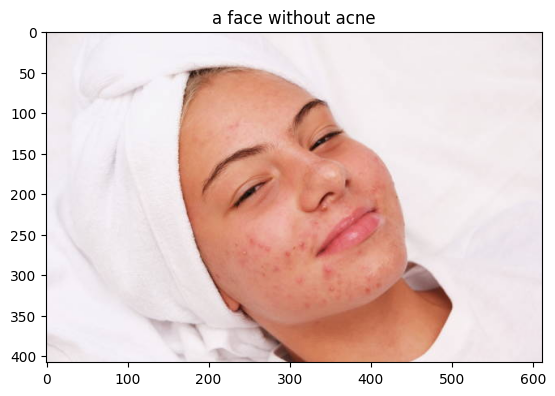

In [12]:
image_paths = glob.glob("./test_filter_acne/*.jpg")
random_image_path = random.choice(image_paths)
print(random_image_path)
predicted_category = classify_image(random_image_path)
plt.imshow(Image.open(random_image_path))
plt.title(f"{predicted_category}")
plt.show()